# Ford GoBike Ride Durations by Month and User Type
## by Ahmed Yasser Mostafa

## Investigation Overview

> The goal from this dataset was to figure out relationships between features and see which had the most impact on the duration of the rides.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the San Francisco Bay area in 2017. This includes the duration of the ride, location of start and destination points and their start and end times.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df['duration_min'] = df['duration_sec'] / 60 # Define new column that includes ride duration in minutes (1 minute = 60 seconds)
df['duration_hour'] = df['duration_min'] / 60 #Define new column that includes ride duration in hours (1 hour = 60 minutes)
df = df.round({'duration_hour': 2, 'duration_min': 0}) # Allow duration (in hours) to have 2 decimal places and duration (in minutes) to have no decimal places
df.duration_min = df.duration_min.astype(int) # Convert ride duration in minutes columns to integer type 

## Distribution of Ride Durations

> Most of the rides take from 2 to 50 minutes.

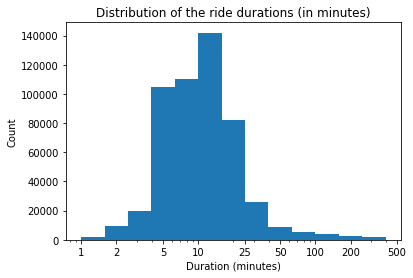

In [10]:
# Changing the x-axis scale to a logarithmic one
bins = 10 ** np.arange(0, 2.56 + 0.2, 0.2) # min: 0, max: 2.56, binsize = 0.2
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 25, 50, 100, 200, 500], [1, 2, 5, 10, 25, 50, 100, 200, 500]); # Changing the default powers of 10 ticks to more readable ticks
plt.xlabel('Duration (minutes)');
plt.ylabel('Count');
plt.title('Distribution of the ride durations (in minutes)');

## Distribution of User Types

> The number of subscribers is almost 4 times the number of normal customers. 

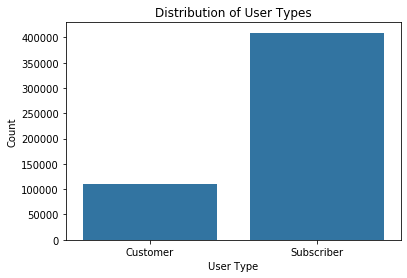

In [5]:
# Checking count of users in each type
sb.countplot(data = df, x = 'user_type', color = sb.color_palette()[0]);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Distribution of User Types');

In [7]:
df['month'] = pd.DatetimeIndex(df['start_time']).month # Define new column which extracts the month from the timestamp of the start time
months = {1:"January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 
          7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"} # Map the month (represented in int) to month (represented in String)


df["month"] = df["month"].map(months) 

## Distribution of Rides by Month

> The data only shows rides from june till the end of the year. Most of the rides are taken towards the end of the year (starting from August primarily) for both customers and subscribers.

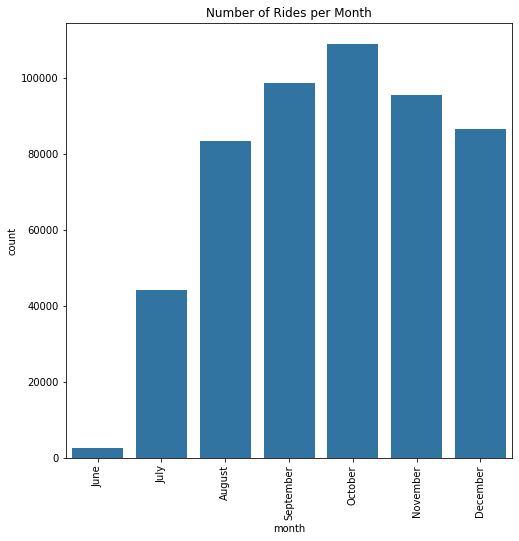

In [9]:
ordered_months = ['June', 'July', "August", "September", "October", 'November', 'December'] # List of months in the dataset (but in correct order)
months_order = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_months) # Defining an ordered categorical data type for the month column
df['month'] = df['month'].astype(months_order) # Set the month's data type to be the same as the the defined data type
plt.figure(figsize = (8, 8));
sb.countplot(data = df, x = 'month', color = sb.color_palette()[0]); # Plotting bar chart for the month column
plt.xticks(rotation = 90); # Rotate labels on x-axis to be more readable
plt.title('Number of Rides per Month');

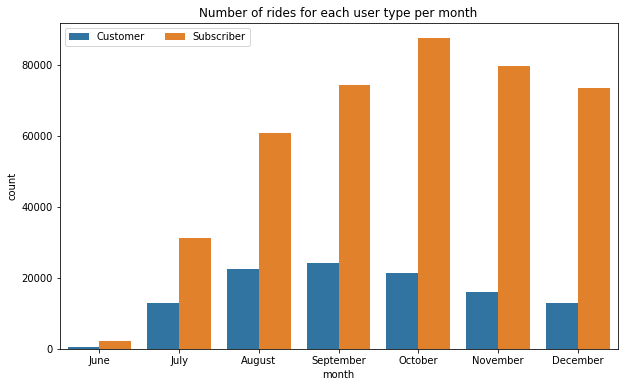

In [31]:
plt.figure(figsize = (10,6))
ax = sb.countplot(data = df, x = 'month', hue = 'user_type');
ax.legend(loc = 0, ncol = 2); # loc = 0 (means best positions) & ncol = 2 (number of values in the column = 2)
plt.title('Number of rides for each user type per month');

## Relationship between Ride Duration and User Type

> The average ride for customers is much more (almost three times higher) than the subscriber's. That could be because subscribers usually take rides more frequently than customers.

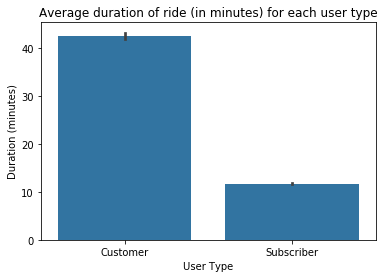

In [11]:
# Average of duration (in minutes) for each user type
sb.barplot(data = df, x = 'user_type', y = 'duration_min', color = sb.color_palette()[0]);
plt.xlabel('User Type');
plt.ylabel('Duration (minutes)');
plt.title('Average duration of ride (in minutes) for each user type');

### Now factoring in the same relationship for each month

> The average duration of the subscriber was surprising more than that of the customer in June and November.

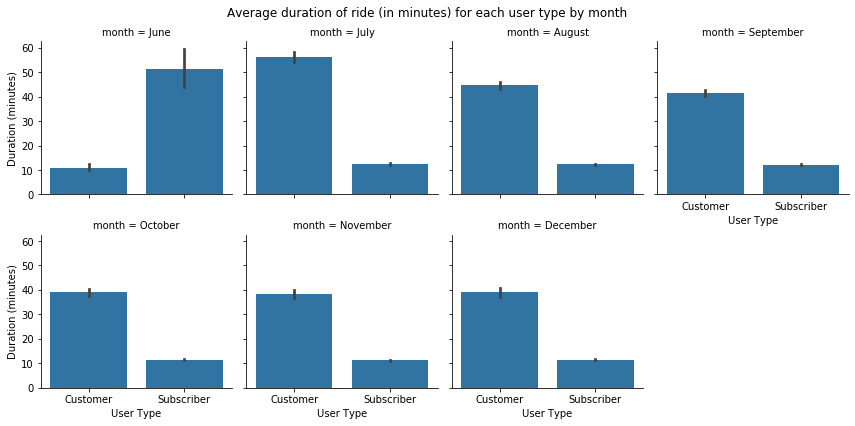

In [30]:
# Plotting the dataframe on multiple levels (levels of the month) where the plot itself will be a barplot. X-axis is user type and y-axis is average of duration (in minutes)
g = sb.FacetGrid(data = df, col = 'month', size = 3, col_wrap = 4); # Size = 3 to increase the graph size and col_wrap = 4 means plot every 4 graphs beside each other
g.map(sb.barplot, 'user_type', 'duration_min', color = sb.color_palette()[0]);
g.set_xlabels('User Type');
g.set_ylabels('Duration (minutes)');
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Average duration of ride (in minutes) for each user type by month');

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!